In [6]:
using DelimitedFiles

# nacteni dat ze souboru
z_data = readdlm("axial_E_field_delim.txt")[:,1]
E_field_data = readdlm("axial_E_field_delim.txt")[:,2];

leng = length(z_data)

# vyberu pouze data pro z< 1mm
# dale pak vyuziju symetrie
z = reverse(-z_data[1:convert(Int64,round(leng/2))]) * 1e-3
append!(z,z_data[1:convert(Int64,round(leng/2))]*1e-3)

E_field = reverse(-E_field_data[1:convert(Int64,round(leng/2))])
append!(E_field, E_field_data[1:convert(Int64,round(leng/2))])

z_cele = reverse(-z_data) * 1e-3
append!(z_cele,z_data*1e-3)

E_field_cele = reverse(-E_field_data)
append!(E_field_cele, E_field_data)


100000-element Array{Float64,1}:
 -622.9411895025062
 -622.9136621848296
 -622.8861281110455
 -622.858587281152 
 -622.831039695151 
 -622.803485353042 
 -622.7759242548253
 -622.7483564004996
 -622.7207817900662
 -622.6932004235246
 -622.6656123008752
 -622.6380174221171
 -622.6104157872512
    ⋮              
  622.6380174221171
  622.6656123008752
  622.6932004235246
  622.7207817900662
  622.7483564004996
  622.7759242548253
  622.803485353042 
  622.831039695151 
  622.858587281152 
  622.8861281110455
  622.9136621848296
  622.9411895025062

In [2]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings
using Formatting

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false";

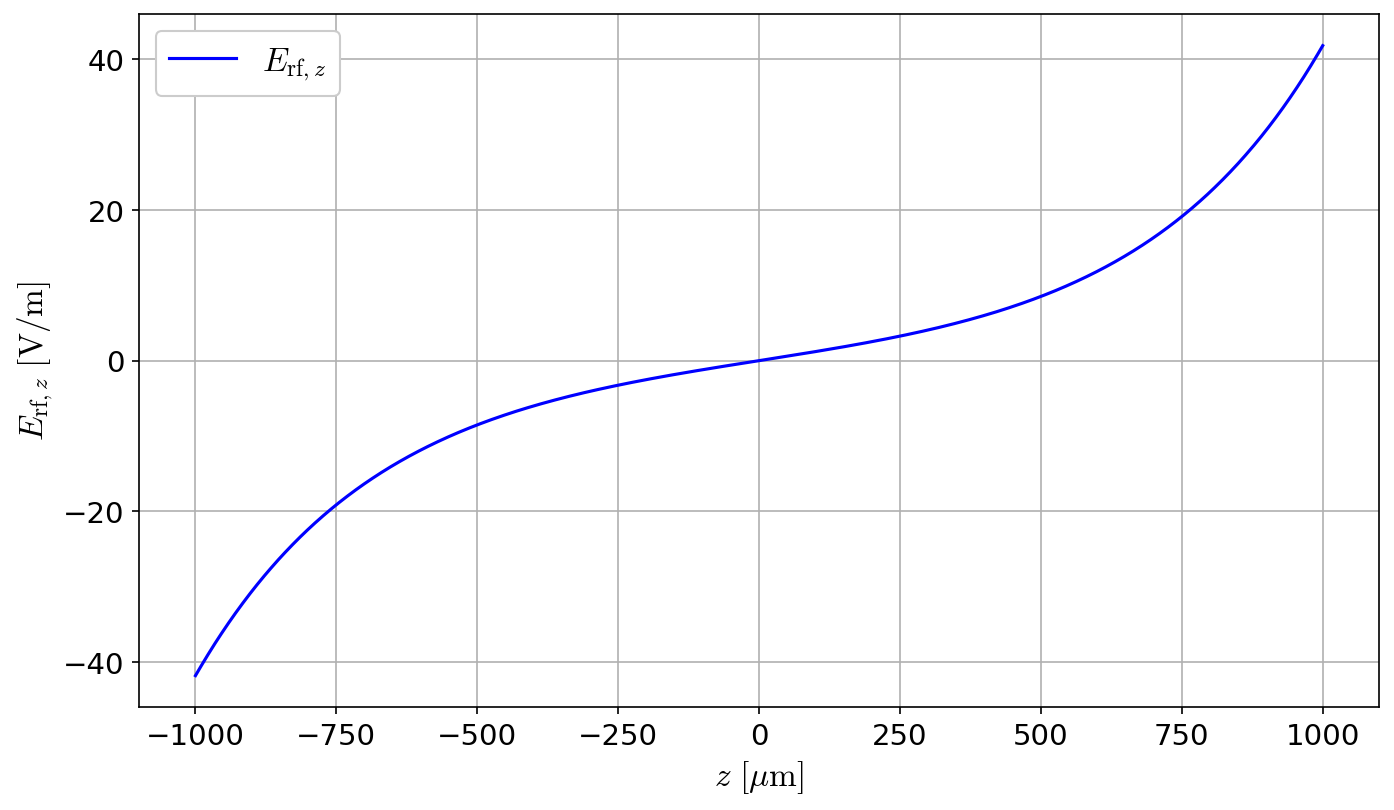

PyObject <matplotlib.legend.Legend object at 0x7f6902dab950>

In [8]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z*1e6, E_field, color="blue", label=L"E_{\rm{rf},\it{z}}")
x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1, fontsize=16)

In [10]:
## fit
using LsqFit
#import Pkg; Pkg.add("LsqFit")
# model
model(z, p) = p[1]*z .+ p[2] * z.*z.*z .+ p[3]* z .*z .*z .*z .*z

#model(z, p) = p[1]*z 

p0 = [12000, 1e10, 1e16]

# fit = curve_fit(model, z*1e3, E_field, p0)
# param = fit.param
# print(param)

# # fit curve
# z_fit = range(minimum(z), maximum(z), length=200)
# E_field_fit = model(z_fit, [param[1]*1e3, param[2]*1e9, param[3]*1e15])

# [param[1]*1e3, param[2]*1e9, param[3]*1e15]


fit = curve_fit(model, z*1e6, E_field, p0)
param = fit.param
print(param)

# fit curve
z_fit = range(minimum(z)-0.001, maximum(z)+0.001, length=200)
E_field_fit = model(z_fit, [param[1]*1e6, param[2]*1e18, param[3]*1e30])

[param[1]*1e6, param[2]*1e18, param[3]*1e30]


[0.01203659299655656, 1.6524840350930352e-8, 1.3106545696951533e-14]

3-element Array{Float64,1}:
 12036.59299655656        
     1.6524840350930351e10
     1.3106545696951534e16

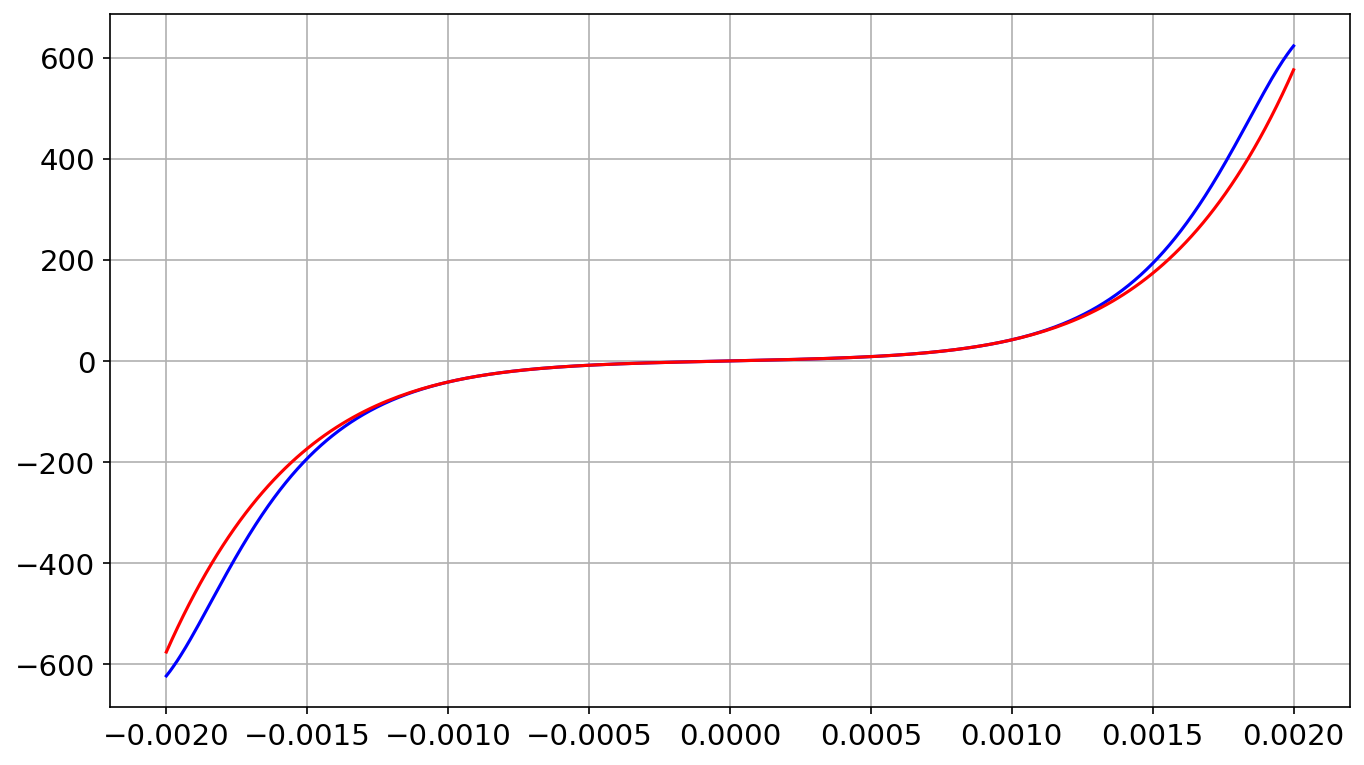

In [11]:
figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z_cele, E_field_cele, color="blue", label=L"\rm{Skutečný \; potenciál}")
line2 = x.plot(z_fit, E_field_fit, color="red", label=L"\rm{Skutečný \; potenciál}")


x.grid()

In [97]:
confidence_interval(fit, 0.99)

3-element Array{Tuple{Float64,Float64},1}:
 (0.012036582117889924, 0.012036603875223196)    
 (1.6524797620375903e-8, 1.65248830814848e-8)    
 (1.3106508201042064e-14, 1.3106583192861002e-14)

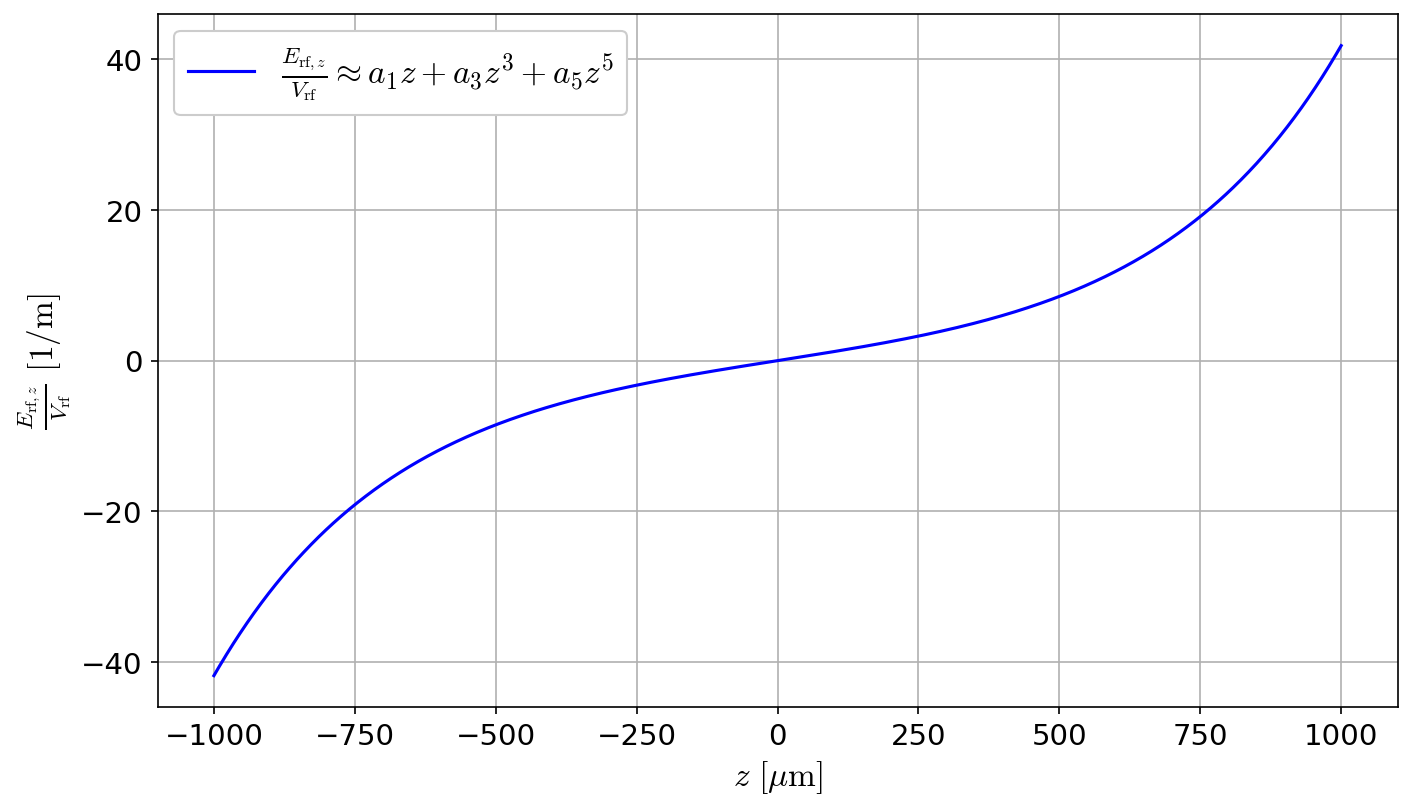

In [134]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z*1e6, E_field, color="blue", label=L" \frac{ E_{\rm{rf},\it{z}} } { V_{\rm rf} } \approx a_1 z + a_3 z^3 + a_5 z^5")
x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"\frac{ E_{\rm{rf},\it{z}} } { V_{\rm rf} } \, \,  \rm{[1/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1, fontsize=16)

#savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/axial_E_field/axial_E_field_witheq.svg", bbox_inches="tight")

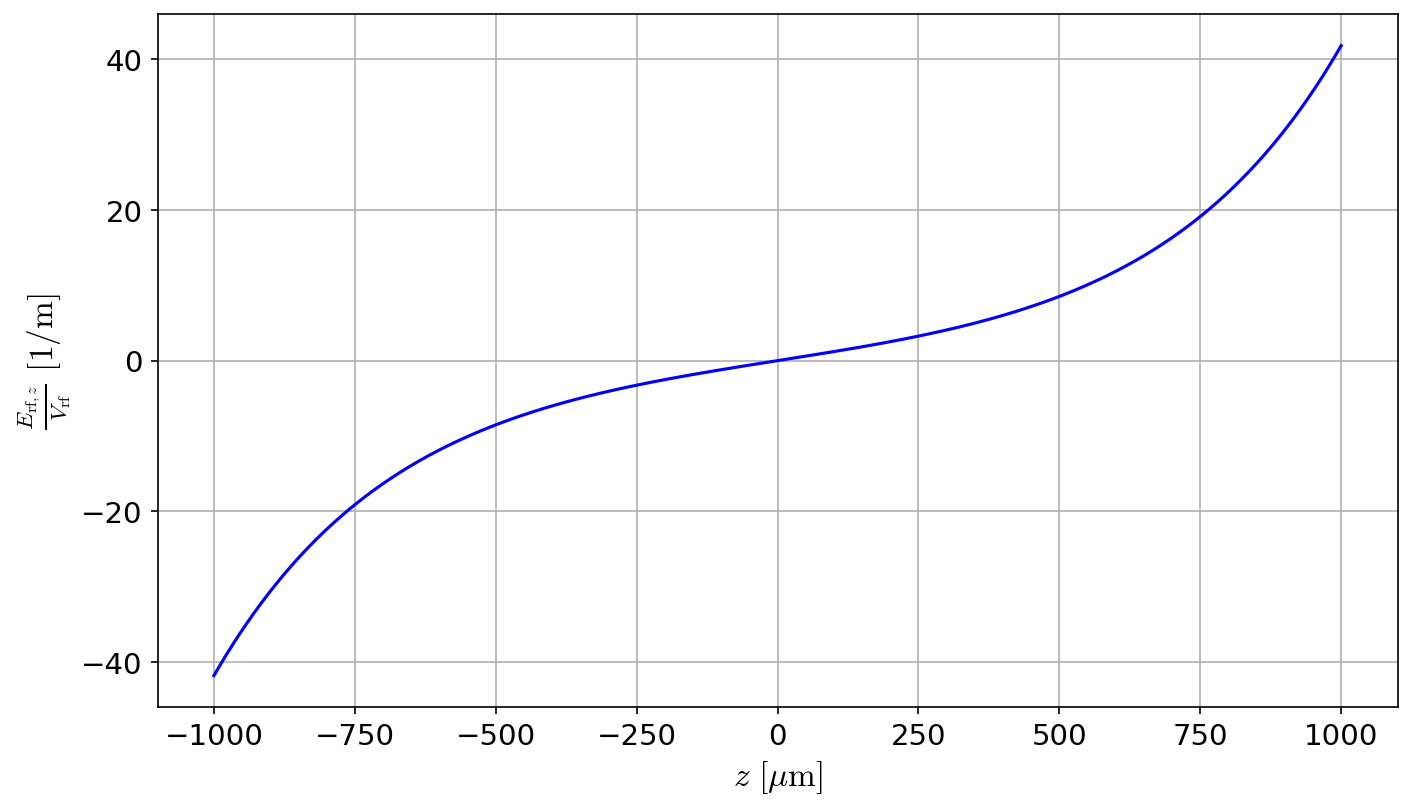

In [135]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z*1e6, E_field, color="blue")
x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"\frac{ E_{\rm{rf},\it{z}} } { V_{\rm rf} } \, \,  \rm{[1/m]}", fontsize=16)

x.grid()

#savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/axial_E_field/axial_E_field_withouteq.svg", bbox_inches="tight")

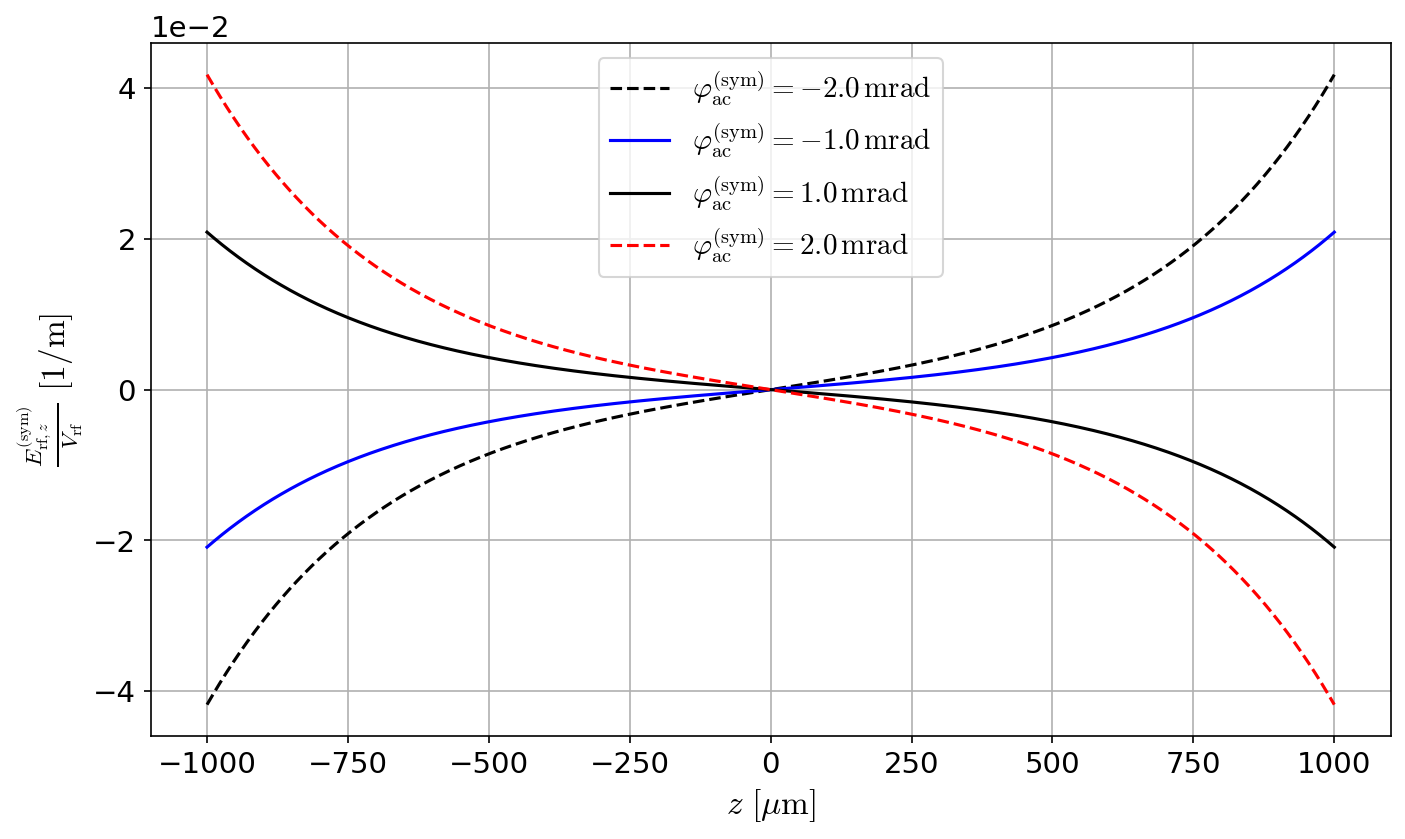

In [93]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

# rozdil faze paru radialnich elektrod
dphi = [-0.002 -0.001 0.001 0.002]

#line1 = x.plot(z*1e6, 350*E_field, color="blue")
#line2 = x.plot(z*1e6, -E_field, color="red")
#line3 = x.plot(z*1e6, cos(pi/2 + dphi)*E_field - cos(pi/2 - dphi)*E_field, color="black", linestyle="--")
line4 = x.plot(z*1e6, -0.5*dphi[1]*E_field, color="black", linestyle="--", label=L" \varphi_{\rm ac}^{\rm (sym)} = "*latexstring(format("{:.1}",dphi[1]*1e3)) * L" \, \rm mrad")
line5 = x.plot(z*1e6, -0.5*dphi[2]*E_field, color="blue", label=L" \varphi_{\rm ac}^{\rm (sym)} = "*latexstring(format("{:.1}",dphi[2]*1e3)) * L" \, \rm mrad")
line6 = x.plot(z*1e6, -0.5*dphi[3]*E_field, color="black", label=L" \varphi_{\rm ac}^{\rm (sym)} = "*latexstring(format("{:.1}",dphi[3]*1e3)) * L" \, \rm mrad")
line7 = x.plot(z*1e6, -0.5*dphi[4]*E_field, color="red", linestyle="--", label=L" \varphi_{\rm ac}^{\rm (sym)} = "*latexstring(format("{:.1}",dphi[4]*1e3)) * L" \, \rm mrad")
x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"\frac{ E_{\rm{rf},\it{z}}^{\rm (sym)} } { V_{\rm rf} } \, \,  \rm{[1/m]}", fontsize=16)
x.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

x.grid()
x.legend(loc=9)

savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/axial_E_field/axial_E_field_phase_diff.svg", bbox_inches="tight")

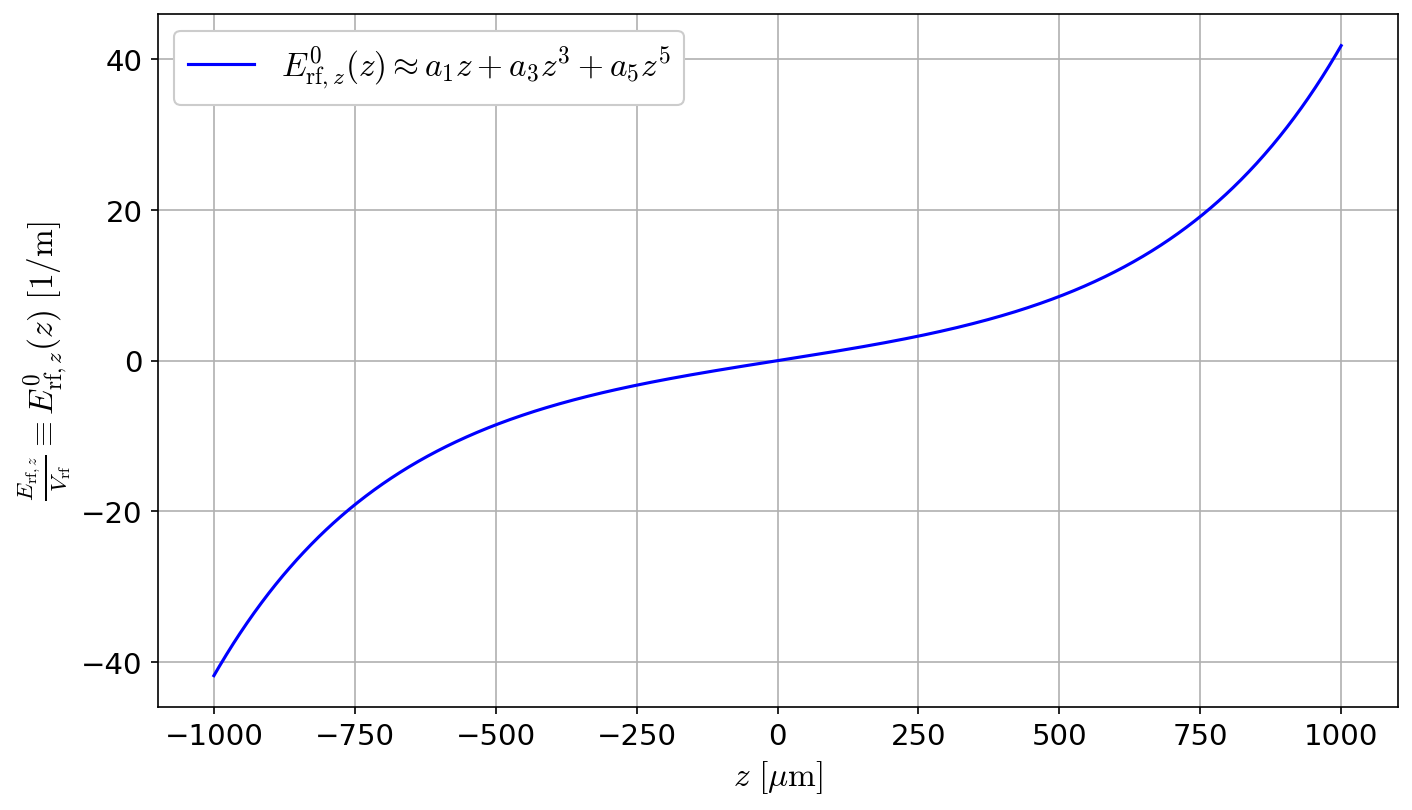

In [57]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z*1e6, E_field, color="blue", label=L" E_{\rm rf, \it z} ^0 (z)   \approx a_1 z + a_3 z^3 + a_5 z^5")
x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"\frac{ E_{\rm{rf},\it{z}} } { V_{\rm rf} } \equiv E_{\rm rf, \it z} ^0 (z) \, \,  \rm{[1/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1, fontsize=16)

#savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/axial_E_field/axial_E_field_witheq_modified_labels.svg", bbox_inches="tight")

3-element Array{Float64,1}:
 0.01203659299655656   
 1.6524840350930352e-8 
 1.3106545696951533e-14